In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
# 讀取訓練和測試資料
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


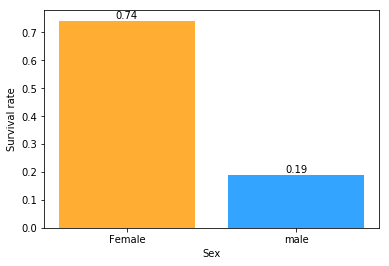

In [23]:
# 檢查女人存活的機率
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

# 檢查男人存活的機率
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

# 畫出女人和男人的存活率: 發現女性存活率較高
X = np.array(['Female', 'male'])
Y = np.array([rate_women, rate_men])
for x, y in zip(X, Y):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.bar(X, Y, color=['#FFAE33', '#33A4FF'])
plt.show()

% of class1 who survived: 0.6296296296296297
% of class2 who survived: 0.4027777777777778
% of class3 who survived: 0.24236252545824846


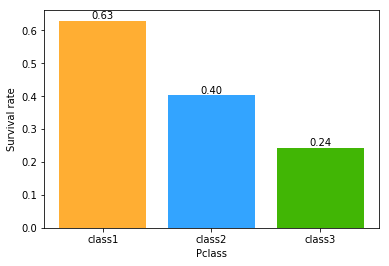

In [24]:
# 檢查艙等(Pclass)是否影響存活的機率
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)
print("% of class1 who survived:", rate_class1)

class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class1)
print("% of class2 who survived:", rate_class2)

class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)
print("% of class3 who survived:", rate_class3)

# 畫出各艙等的存活率: 發現艙等高，存活率較高
X = np.array(['class1', 'class2', 'class3'])
Y = np.array([rate_class1, rate_class2, rate_class3])
for x, y in zip(X, Y):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('Pclass')
plt.ylabel('Survival rate')
plt.bar(X, Y, color=['#FFAE33', '#33A4FF', '#41B605'])
plt.show()

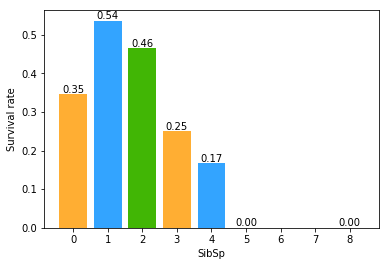

In [25]:
# 檢查兄弟姊妹數量(SibSp)是否影響存活的機率
SibSp = np.unique(train_data['SibSp'])
rate_SibSp = []
for i in range(len(SibSp)):
	Sib = train_data.loc[train_data.SibSp == SibSp[i]]["Survived"]
	rate = sum(Sib)/len(Sib)
	rate_SibSp.append(rate)

# 畫出兄弟姊妹數量(SibSp)之存活率: 發現登船兄弟姊妹的數量過多不利於逃生
for x, y in zip(SibSp, rate_SibSp):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('SibSp')
plt.ylabel('Survival rate')
plt.xticks(np.arange(9))
plt.bar(SibSp, rate_SibSp, color=['#FFAE33', '#33A4FF', '#41B605'])
plt.show()

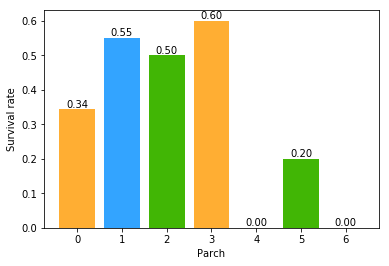

In [26]:
# 檢查直系血親數量(Parch)是否影響存活的機率
Parch = np.unique(train_data['Parch'])
rate_Parch = []
for i in range(len(Parch)):
	Par = train_data.loc[train_data.Parch == Parch[i]]["Survived"]
	rate = sum(Par)/len(Par)
	rate_Parch.append(rate)

# 畫出直系血親數量(Parch)之存活率
for x, y in zip(Parch, rate_Parch):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('Parch')
plt.ylabel('Survival rate')
plt.bar(Parch, rate_Parch, color=['#FFAE33', '#33A4FF', '#41B605'])
plt.show()

% of S who survived: 0.33695652173913043
% of C who survived: 0.5535714285714286
% of Q who survived: 0.38961038961038963


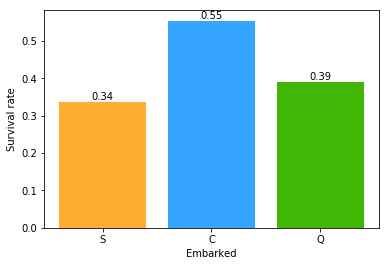

In [27]:
# 檢查登船港口(Embarked)是否影響存活的機率
S = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_S = sum(S)/len(S)
print("% of S who survived:", rate_S)

C = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_C = sum(C)/len(C)
print("% of C who survived:", rate_C)

Q = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_Q = sum(Q)/len(Q)
print("% of Q who survived:", rate_Q)

# 登船港口(Embarked)之存活率
X = np.array(['S', 'C', 'Q'])
Y = np.array([rate_S, rate_C, rate_Q])
for x, y in zip(X, Y):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('Embarked')
plt.ylabel('Survival rate')
plt.bar(X, Y, color=['#FFAE33', '#33A4FF', '#41B605'])
plt.show()

% of Fare1 who survived: 0.19940476190476192
% of Fare2 who survived: 0.4245810055865922
% of Fare3 who survived: 0.43
% of Fare4 who survived: 0.5740740740740741
% of Fare5 who survived: 0.6721311475409836


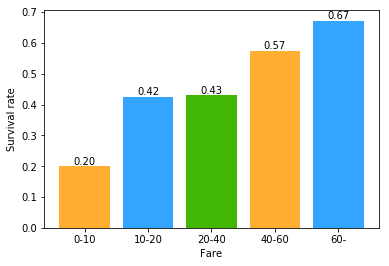

In [28]:
# 檢查票價(Fare)是否影響存活的機率
Fare = train_data['Fare']
x = np.linspace(min(Fare), max(Fare), 5)
count = []
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in range(len(Fare)):
	if Fare[i] <= 10:
		count1 += 1
	elif 10 < Fare[i] <= 20:
		count2 += 1
	elif 20 < Fare[i] <= 40:
		count3 += 1
	elif 40 < Fare[i] <= 60:
		count4 += 1
	else:
		count5 += 1
	
count = [count1, count2, count3, count4, count5]

Fare1 = train_data.loc[train_data.Fare <= 10]["Survived"]
rate_Fare1 = sum(Fare1)/len(Fare1)
print("% of Fare1 who survived:", rate_Fare1)

Fare2 = train_data.loc[(10 < train_data.Fare) & (train_data.Fare <= 20)]["Survived"]
rate_Fare2 = sum(Fare2)/len(Fare2)
print("% of Fare2 who survived:", rate_Fare2)

Fare3 = train_data.loc[(20 < train_data.Fare) & (train_data.Fare <= 40)]["Survived"]
rate_Fare3 = sum(Fare3)/len(Fare3)
print("% of Fare3 who survived:", rate_Fare3)

Fare4 = train_data.loc[(40 < train_data.Fare) & (train_data.Fare <= 60)]["Survived"]
rate_Fare4 = sum(Fare4)/len(Fare4)
print("% of Fare4 who survived:", rate_Fare4)

Fare5 = train_data.loc[60 < train_data.Fare]["Survived"]
rate_Fare5 = sum(Fare5)/len(Fare5)
print("% of Fare5 who survived:", rate_Fare5)

# 畫出各票價(Fare)區間之存活率: 發現票價高存活率高
X = np.array(['0-10', '10-20', '20-40', '40-60', '60-'])
Y = np.array([rate_Fare1, rate_Fare2, rate_Fare3, rate_Fare4, rate_Fare5])
for x, y in zip(X, Y):
	plt.text(x, y, '%.2f'%y, ha='center', va='bottom')
plt.xlabel('Fare')
plt.ylabel('Survival rate')
plt.bar(X, Y, color=['#FFAE33', '#33A4FF', '#41B605'])
plt.show()

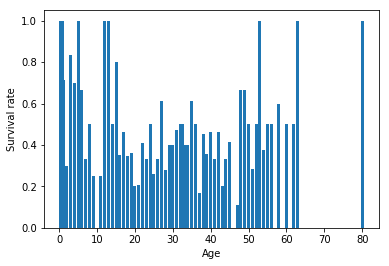

In [29]:
# 檢查年齡(Age)是否影響存活的機率
Age = np.unique(train_data['Age'])
Age = [x for x in Age if x > 0]
rate_Age = []
for i in range(len(Age)):
	A = train_data.loc[train_data.Age == Age[i]]["Survived"]
	rate = sum(A)/len(A)
	rate_Age.append(rate)

# 畫出各年齡(Age)之存活率: 發現年紀低於15歲存活率高
plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.bar(Age, rate_Age)
plt.show()

Text(0, 0.5, 'f(x)')

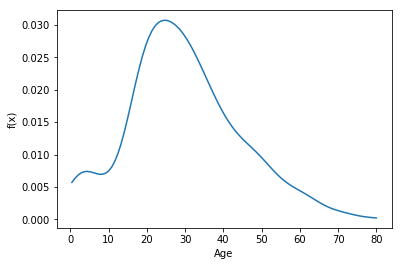

In [30]:
from scipy.stats.kde import gaussian_kde

Age_R = train_data['Age']
Age_R = [x for x in Age_R if x > 0]
kde = gaussian_kde(Age_R)
dist_space = np.linspace(min(Age_R), max(Age_R), 100 )

# 畫出原始年齡資料(Age)的機率分布
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Age')
plt.ylabel('f(x)')

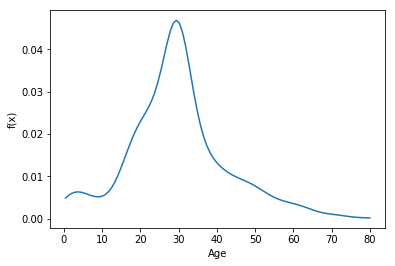

In [31]:
# 年齡(Age)資料補遺，並輸出成new_train.csv
Age_mean = sum(Age_R) / len(Age_R)
Age_mean = round(Age_mean, 2)
train_data['Age'] = train_data['Age'].replace(np.nan, Age_mean)
train_data.to_csv('new_train.csv', index=False)

Age_R2 = train_data['Age']
kde = gaussian_kde(Age_R2)
dist_space = np.linspace(min(Age_R2), max(Age_R2), 100 )
# 畫出補遺後年齡資料(Age)的機率分布
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Age')
plt.ylabel('f(x)')
plt.show()

In [32]:
# 特徵選取
new_train_data = pd.read_csv('new_train.csv')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] 

# One-hot encoding: 因電腦只會做數學運算
X = pd.get_dummies(new_train_data[features])
X_arr = X.values #Dataframe to np array

#標準化
X_arr_normal = preprocessing.scale(X_arr) 

In [34]:
# 利用random forest model建模
y = new_train_data["Survived"]

# 將訓練資料分成五個part做交叉驗證
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
scores = cross_val_score(model, X_arr_normal, y, cv=5, scoring='accuracy')
print (scores)
print (scores.mean())
model.fit(X_arr_normal, y)

[0.79888268 0.81564246 0.8258427  0.79213483 0.84745763]
0.8159920589746672


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
# 測試資料的Age資料需要補遺，假設也採用平均值補遺
Test_Age = test_data['Age']
Test_Age_R = [x for x in Test_Age if x > 0]
Test_Age_mean = sum(Test_Age_R) / len(Test_Age_R)
Test_Age_mean = round(Test_Age_mean, 2)
test_data['Age'] = test_data['Age'].replace(np.nan, Test_Age_mean)

# 發現test_data['Fare']也有一個nan值，以平均值補上
test_data['Fare'] = test_data['Fare'].replace(np.nan, 32.63) 
X_test = pd.get_dummies(test_data[features])

In [42]:
# 將測試資料的特徵也標準化
X_test_normal = preprocessing.scale(X_test)
predictions = model.predict(X_test_normal)

# 輸出成csv檔
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_R2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


C:\Users\waukin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [44]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
